### **Visualizing Persian Text Insights: A Word Cloud Analysis with Hazm**


Hazm is a powerful natural language processing (NLP) library designed specifically for the Persian language in Python. This open-source library provides a comprehensive set of tools and functionalities for various NLP tasks, including text tokenization, stemming, lemmatization, and more. With a focus on the unique linguistic characteristics of the Persian language, Hazm facilitates the analysis and processing of Persian text data. It has become an essential resource for developers and researchers working on projects involving Persian language processing, enabling them to perform sophisticated linguistic analyses and gain insights into the structure and semantics of Persian text. Hazm plays a crucial role in bridging the gap between the general-purpose NLP tools available in Python and the specific requirements of Persian language processing, making it an invaluable asset for anyone working with Persian text data in the realm of natural language processing.



In [1]:
!pip install hazm -q

In [2]:
import pandas as pd
import string
import matplotlib.pyplot as ptl
import wordcloud
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# Specify the path to your Excel file
excel_file_path = "/content/sample_data/facebook_posts.xlsx"

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file_path)

messages = df['Message']

# Display the "Message" column
print(messages)


0     ⁄©ŸÜŸÅÿ±ÿßŸÜÿ≥ ÿ≤ŸÜÿßŸÜ ÿØÿ± ÿØ€åÿ™ÿßÿ≥ÿß€åŸÜÿ≥ ÿ®Ÿá ŸÖŸÜÿßÿ≥ÿ®ÿ™ Ÿáÿ¥ÿ™ ŸÖÿßÿ±⁄Ü! ...
1     ÿ±Ÿàÿ≤ ÿ¨ŸáÿßŸÜ€å ÿ≤ŸÜÿßŸÜ ÿ±ÿß ⁄Øÿ±ÿßŸÖ€å ŸÖ€å ÿØÿßÿ±€åŸÖ Ÿà Ÿæÿß€åÿØÿßÿ±€å Ÿà ŸÖ...
2     ⁄©ŸÜŸÅÿ±ÿßŸÜÿ≥ ÿ≤ŸÜÿßŸÜ ÿØÿ± ÿØ€åÿ™ÿßÿ≥ÿß€åŸÜÿ≥! üåü\nhttps://www.wids...
3     ŸÖÿπÿ±ŸÅ€å ÿßÿπÿ∂ÿß€å ÿ¨ÿØ€åÿØ üåü\nÿØÿ± ÿßÿØÿßŸÖŸá ÿ±ÿ¥ÿØ Ÿà ⁄Øÿ≥ÿ™ÿ±ÿ¥ ÿ™€åŸÖ ¬´...
4     Ÿàÿ®€åŸÜÿßÿ± ÿ™ÿ≠ÿµ€åŸÑ ÿØÿ± ÿÆÿßÿ±ÿ¨ - ÿ¥ÿ±⁄©ÿ™ ÿßŸæŸÑÿß€å ÿ®Ÿàÿ±ÿØ (ApplyB...
                            ...                        
64    The Women in Tech Afghanistan Chapter is respo...
65    #womenintech #AfghanWomen #inclusion #diversit...
66    ⁄ÜŸæÿ™ÿ± ÿßŸÅÿ∫ÿßŸÜÿ≥ÿ™ÿßŸÜ - ÿ≤ŸÜÿßŸÜ ÿØÿ± ÿ™⁄©ŸÜÿßŸÑŸà⁄ò€å ÿ≤€åÿ± ŸÖÿ¨ŸÖŸàÿπŸá ÿß...
67    Women in Tech Afghanistan is a chapter of Wome...
68    We are so thrilled to announce the launch of o...
Name: Message, Length: 69, dtype: object


In [4]:
from hazm import stopwords_list, word_tokenize
import re


# Extract the "Message" column
messages = df['Message']

# Combine all messages into a single string
corpus = ' '.join(messages)

# Tokenize the text using hazm.word_tokenize
words = word_tokenize(corpus.lower())

# Remove punctuation and keep only alphabetical words
filtered_words = [word for word in words if word.isalpha()]

# Get the list of Persian stopwords from hazm
stop_words = set(stopwords_list())

# Define a regex pattern for Persian characters
persian_pattern = re.compile(r'^[\u0600-\u06FF]+$')

# Filter out stopwords and non-Persian words
filtered_sentence = [w for w in filtered_words if w not in stop_words and persian_pattern.match(w)]

# Eliminate words with hashtags attached in between Persian words
final_filtered_words = []
i = 0
while i < len(filtered_sentence):
    # Check if the word has a '#' in it
    if '#' in filtered_sentence[i]:
        # Split the word by '#' and keep only the last part
        parts = filtered_sentence[i].split('#')
        final_filtered_words.append(parts[-1])
    else:
        final_filtered_words.append(filtered_sentence[i])
    i += 1

# Print the final filtered words
print(final_filtered_words)


['⁄©ŸÜŸÅÿ±ÿßŸÜÿ≥', 'ÿ≤ŸÜÿßŸÜ', 'ÿØ€åÿ™ÿßÿ≥ÿß€åŸÜÿ≥', 'ŸÖŸÜÿßÿ≥ÿ®ÿ™', 'Ÿáÿ¥ÿ™', 'ŸÖÿßÿ±⁄Ü', 'ŸáŸÖÿ≤ŸÖÿßŸÜ', '⁄©ŸÜŸÅÿ±ÿßŸÜÿ≥', 'ÿ¨ŸáÿßŸÜ€å', 'ÿ≥ÿßÿ≤ŸÖÿßŸÜ', 'ÿ≤ŸÜÿßŸÜ', 'ÿØ€åÿ™ÿßÿ≥ÿß€åŸÜÿ≥', 'ÿØÿßŸÜÿ¥⁄ØÿßŸá', 'ÿßÿ≥ÿ™ŸÜŸÅŸàÿ±ÿØ', '⁄ÜŸæÿ™ÿ±', 'ÿßŸÅÿ∫ÿßŸÜÿ≥ÿ™ÿßŸÜ', 'ÿßŸÅÿ™ÿÆÿßÿ±', '⁄©ŸÜŸÅÿ±ÿßŸÜÿ≥', 'ÿ≤ŸÜÿßŸÜ', 'ÿØ€åÿ™ÿßÿ≥ÿß€åŸÜÿ≥', 'ÿ¥⁄©ŸÑ', 'ÿßÿÆÿ™ÿµÿßÿµ€å', 'ÿ≤ŸÜÿßŸÜ', 'ÿßŸÅÿ∫ÿßŸÜÿ≥ÿ™ÿßŸÜ', 'ÿ®ÿ±⁄Øÿ≤ÿßÿ±', 'ŸÜŸÖÿß€åÿØ', 'ÿ™ÿ¥⁄©ÿ±', 'ŸæŸÜŸÑ€åÿ≥ÿ™', 'Ÿáÿß', 'ÿ¥ÿ±⁄©ÿ™', 'ÿπÿ≤€åÿ≤', 'ÿ®ÿ±⁄Øÿ≤ÿßÿ±€å', 'ŸÖŸàŸÅŸÇÿßŸÜŸá', '⁄©ŸÜŸÅÿ±ÿßŸÜÿ≥', 'ÿ≤ŸÜÿßŸÜ', 'ÿØ€åÿ™ÿßÿ≥ÿß€åŸÜÿ≥', 'ÿßŸÅÿ∫ÿßŸÜÿ≥ÿ™ÿßŸÜ', 'ÿ≠ÿ∂Ÿàÿ±', '⁄Øÿ≥ÿ™ÿ±ÿØŸá', 'ÿπÿ≤€åÿ≤ÿßŸÜ', 'ŸÅÿ±ÿßÿ™ÿ±', 'ÿßŸÜÿ™ÿ∏ÿßÿ±ÿßÿ™', '⁄ØŸàÿßŸá€å', 'ÿßÿ¥ÿ™€åÿßŸÇ', 'ÿ≠ŸÖÿß€åÿ™', 'Ÿæ€åÿ¥ÿ±ŸÅÿ™', 'ÿ≤ŸÜÿßŸÜ', 'ÿØÿ±ÿ™⁄©ŸÜÿßŸÑŸà⁄òŸä', 'ÿØ€åÿ™ÿßÿ≥ÿß€åŸÜÿ≥', 'ÿßŸÜÿ±⁄ò€å', 'ÿßÿ¥ÿ™€åÿßŸÇ', 'ÿßŸÑŸáÿßŸÖ', 'ÿ™ÿ®ÿ±€å⁄©', 'ÿ®ÿßŸÜŸà€å', 'ÿ¥ÿ±⁄©ÿ™', 'ÿÆŸàÿ¥', 'ÿ¥ÿßŸÜÿ≥', 'ŸÇÿ±ÿπŸá', '⁄©ÿ¥€å', 'ÿ®ÿ±ŸÜÿØŸá', 'ÿ®ÿ≥ÿ™Ÿá', 'ÿß€åŸÜÿ™ÿ±ŸÜÿ™', 'ÿßŸÅÿ∫ÿßŸÜ€å', 'ÿ¨Ÿàÿß€åÿ≤', 'ÿ≤ŸàÿØ€å',

In [5]:
from hazm import word_tokenize

# Join the list of words into a string
corpus = ' '.join(final_filtered_words)

# Tokenize the Persian text
words = word_tokenize(corpus)

# Create a dictionary for frequency distribution
frequency_dist = {}

# Count the occurrences of each word
for word in words:
    frequency_dist[word] = frequency_dist.get(word, 0) + 1

# Filter out short words (length > 3)
large_words = {k: v for k, v in frequency_dist.items() if len(k) > 3}

# Print the frequency distribution for larger Persian words
print(large_words)

{'⁄©ŸÜŸÅÿ±ÿßŸÜÿ≥': 7, 'ÿ≤ŸÜÿßŸÜ': 83, 'ÿØ€åÿ™ÿßÿ≥ÿß€åŸÜÿ≥': 14, 'ŸÖŸÜÿßÿ≥ÿ®ÿ™': 3, 'ŸÖÿßÿ±⁄Ü': 8, 'ŸáŸÖÿ≤ŸÖÿßŸÜ': 1, 'ÿ¨ŸáÿßŸÜ€å': 10, 'ÿ≥ÿßÿ≤ŸÖÿßŸÜ': 21, 'ÿØÿßŸÜÿ¥⁄ØÿßŸá': 8, 'ÿßÿ≥ÿ™ŸÜŸÅŸàÿ±ÿØ': 1, '⁄ÜŸæÿ™ÿ±': 2, 'ÿßŸÅÿ∫ÿßŸÜÿ≥ÿ™ÿßŸÜ': 55, 'ÿßŸÅÿ™ÿÆÿßÿ±': 2, 'ÿßÿÆÿ™ÿµÿßÿµ€å': 2, 'ÿ®ÿ±⁄Øÿ≤ÿßÿ±': 14, 'ŸÜŸÖÿß€åÿØ': 9, 'ÿ™ÿ¥⁄©ÿ±': 12, 'ŸæŸÜŸÑ€åÿ≥ÿ™': 1, 'ÿ¥ÿ±⁄©ÿ™': 32, 'ÿπÿ≤€åÿ≤': 1, 'ÿ®ÿ±⁄Øÿ≤ÿßÿ±€å': 7, 'ŸÖŸàŸÅŸÇÿßŸÜŸá': 1, 'ÿ≠ÿ∂Ÿàÿ±': 6, '⁄Øÿ≥ÿ™ÿ±ÿØŸá': 3, 'ÿπÿ≤€åÿ≤ÿßŸÜ': 1, 'ŸÅÿ±ÿßÿ™ÿ±': 1, 'ÿßŸÜÿ™ÿ∏ÿßÿ±ÿßÿ™': 1, '⁄ØŸàÿßŸá€å': 1, 'ÿßÿ¥ÿ™€åÿßŸÇ': 2, 'ÿ≠ŸÖÿß€åÿ™': 14, 'Ÿæ€åÿ¥ÿ±ŸÅÿ™': 6, 'ÿØÿ±ÿ™⁄©ŸÜÿßŸÑŸà⁄òŸä': 1, 'ÿßŸÜÿ±⁄ò€å': 1, 'ÿßŸÑŸáÿßŸÖ': 9, 'ÿ™ÿ®ÿ±€å⁄©': 1, 'ÿ®ÿßŸÜŸà€å': 1, 'ÿ¥ÿßŸÜÿ≥': 1, 'ŸÇÿ±ÿπŸá': 3, 'ÿ®ÿ±ŸÜÿØŸá': 1, 'ÿ®ÿ≥ÿ™Ÿá': 3, 'ÿß€åŸÜÿ™ÿ±ŸÜÿ™': 1, 'ÿßŸÅÿ∫ÿßŸÜ€å': 1, 'ÿ¨Ÿàÿß€åÿ≤': 1, 'ÿ≤ŸàÿØ€å': 4, 'ÿß€åŸÖ€åŸÑ': 8, 'ÿßŸÖ€åÿØ': 2, 'ÿ¢ÿ≤ÿßÿØ': 1, 'ÿ™ŸàÿßŸÜŸÖŸÜÿØÿ™ÿ±': 1, '⁄Øÿ∞ÿ¥ÿ™Ÿá': 4, '⁄Øÿ±ÿßŸÖ€å': 5, 'Ÿæÿß€åÿØÿßÿ±€å': 1, 'ŸÖŸÇÿßŸàŸÖÿ™': 1, 'ŸÇŸáÿ±ŸÖÿßŸÜ': 2, 'ÿ≥ÿ™ÿß€å€åŸÖ':

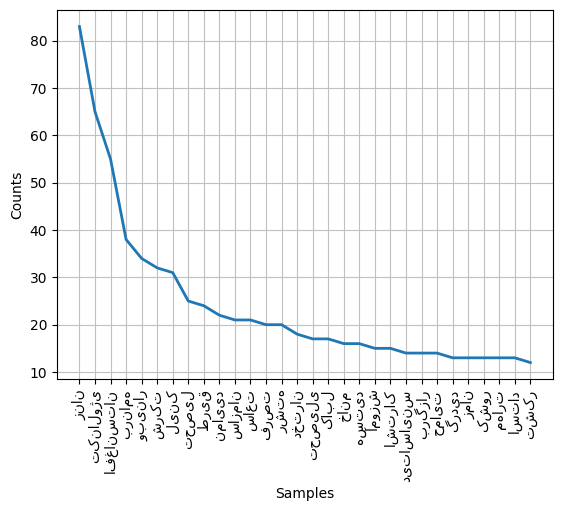

<Axes: xlabel='Samples', ylabel='Counts'>

In [6]:
frequency_dist = nltk.FreqDist(large_words)
frequency_dist
frequency_dist.plot(30,cumulative=False)

In [2]:
!pip install persian_wordcloud -q

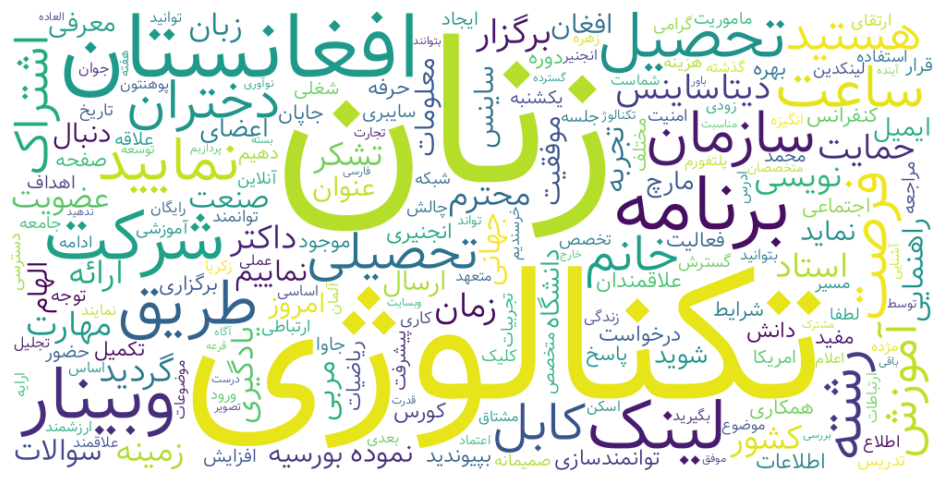

In [8]:
from persian_wordcloud.wordcloud import PersianWordCloud
import matplotlib.pyplot as plt

# Create a PersianWordCloud object
wordcloud = PersianWordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(large_words)

# Plot the Persian WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()